In [13]:
import pandas as pd
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [12]:
x = df.iloc[: ,[3,4] ].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Chossing number of clusters
 using a parameter WCSS --> Within Cluster Sum of Square

In [14]:
# finding wcss value for differenrt number of cluster
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i , init='k-means++' , random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) #this will give wcss value for each cluster


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

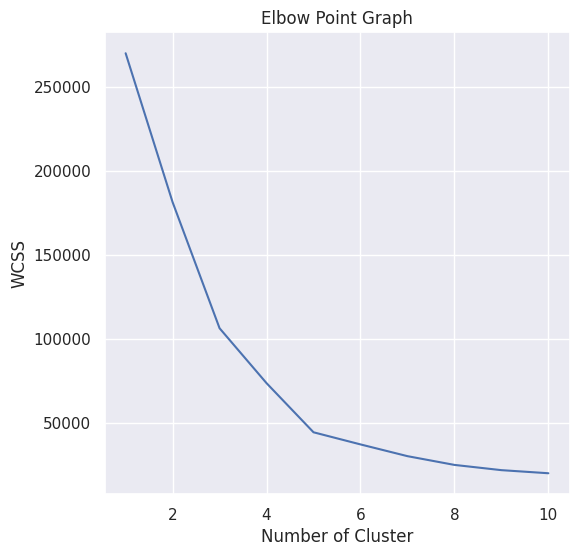

In [20]:
# create elbow graph to find which cluster has min value
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(range(1,11) , wcss)
plt.title("Elbow Point Graph")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()


Optimum number of cluster be 5

Training KMeans Clustering Model

In [21]:
#  k  = 5
kmeans = KMeans(n_clusters=5 , init = 'k-means++' , random_state = 0)

# return label for each cluster data point based on there cluster
# our data will get segregated into 5 cluster

y = kmeans.fit_predict(x) # this will return cluster number for each data point
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualisation of all the clusters


5 Clusters --> 0,1,2,3,4

<function matplotlib.pyplot.show(close=None, block=None)>

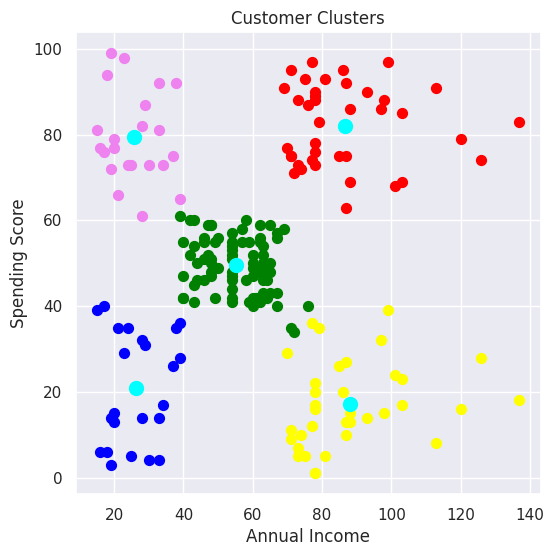

In [24]:
# plotting all the cluster and there centroid
plt.figure(figsize = (6,6))
plt.scatter(x[y == 0,0] , x[y == 0,1] , s=50 , c='green' , label = 'Cluster 1')
plt.scatter(x[y == 1,0] , x[y == 1,1] , s=50 , c='red' , label = 'Cluster 2')
plt.scatter(x[y == 2,0] , x[y == 2,1] , s=50 , c='yellow' , label = 'Cluster 3')
plt.scatter(x[y == 3,0] , x[y == 3,1] , s=50 , c='blue' , label = 'Cluster 4')
plt.scatter(x[y == 4,0] , x[y == 4,1] , s=50 , c='violet' , label = 'Cluster 5')

# s represnts the size of scatter plots
# first number represents the value of cluseter 0 second represents the first column of x
# third zero represnts the values of cluster 0 and fourth represents the second column of x

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s=100 , c='cyan' , label ="Centroids")
# 0 represents centroid of x axis and 1 represnts y axis value of centroids
plt.title("Customer Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show